# Laptop Price Prediction using ML
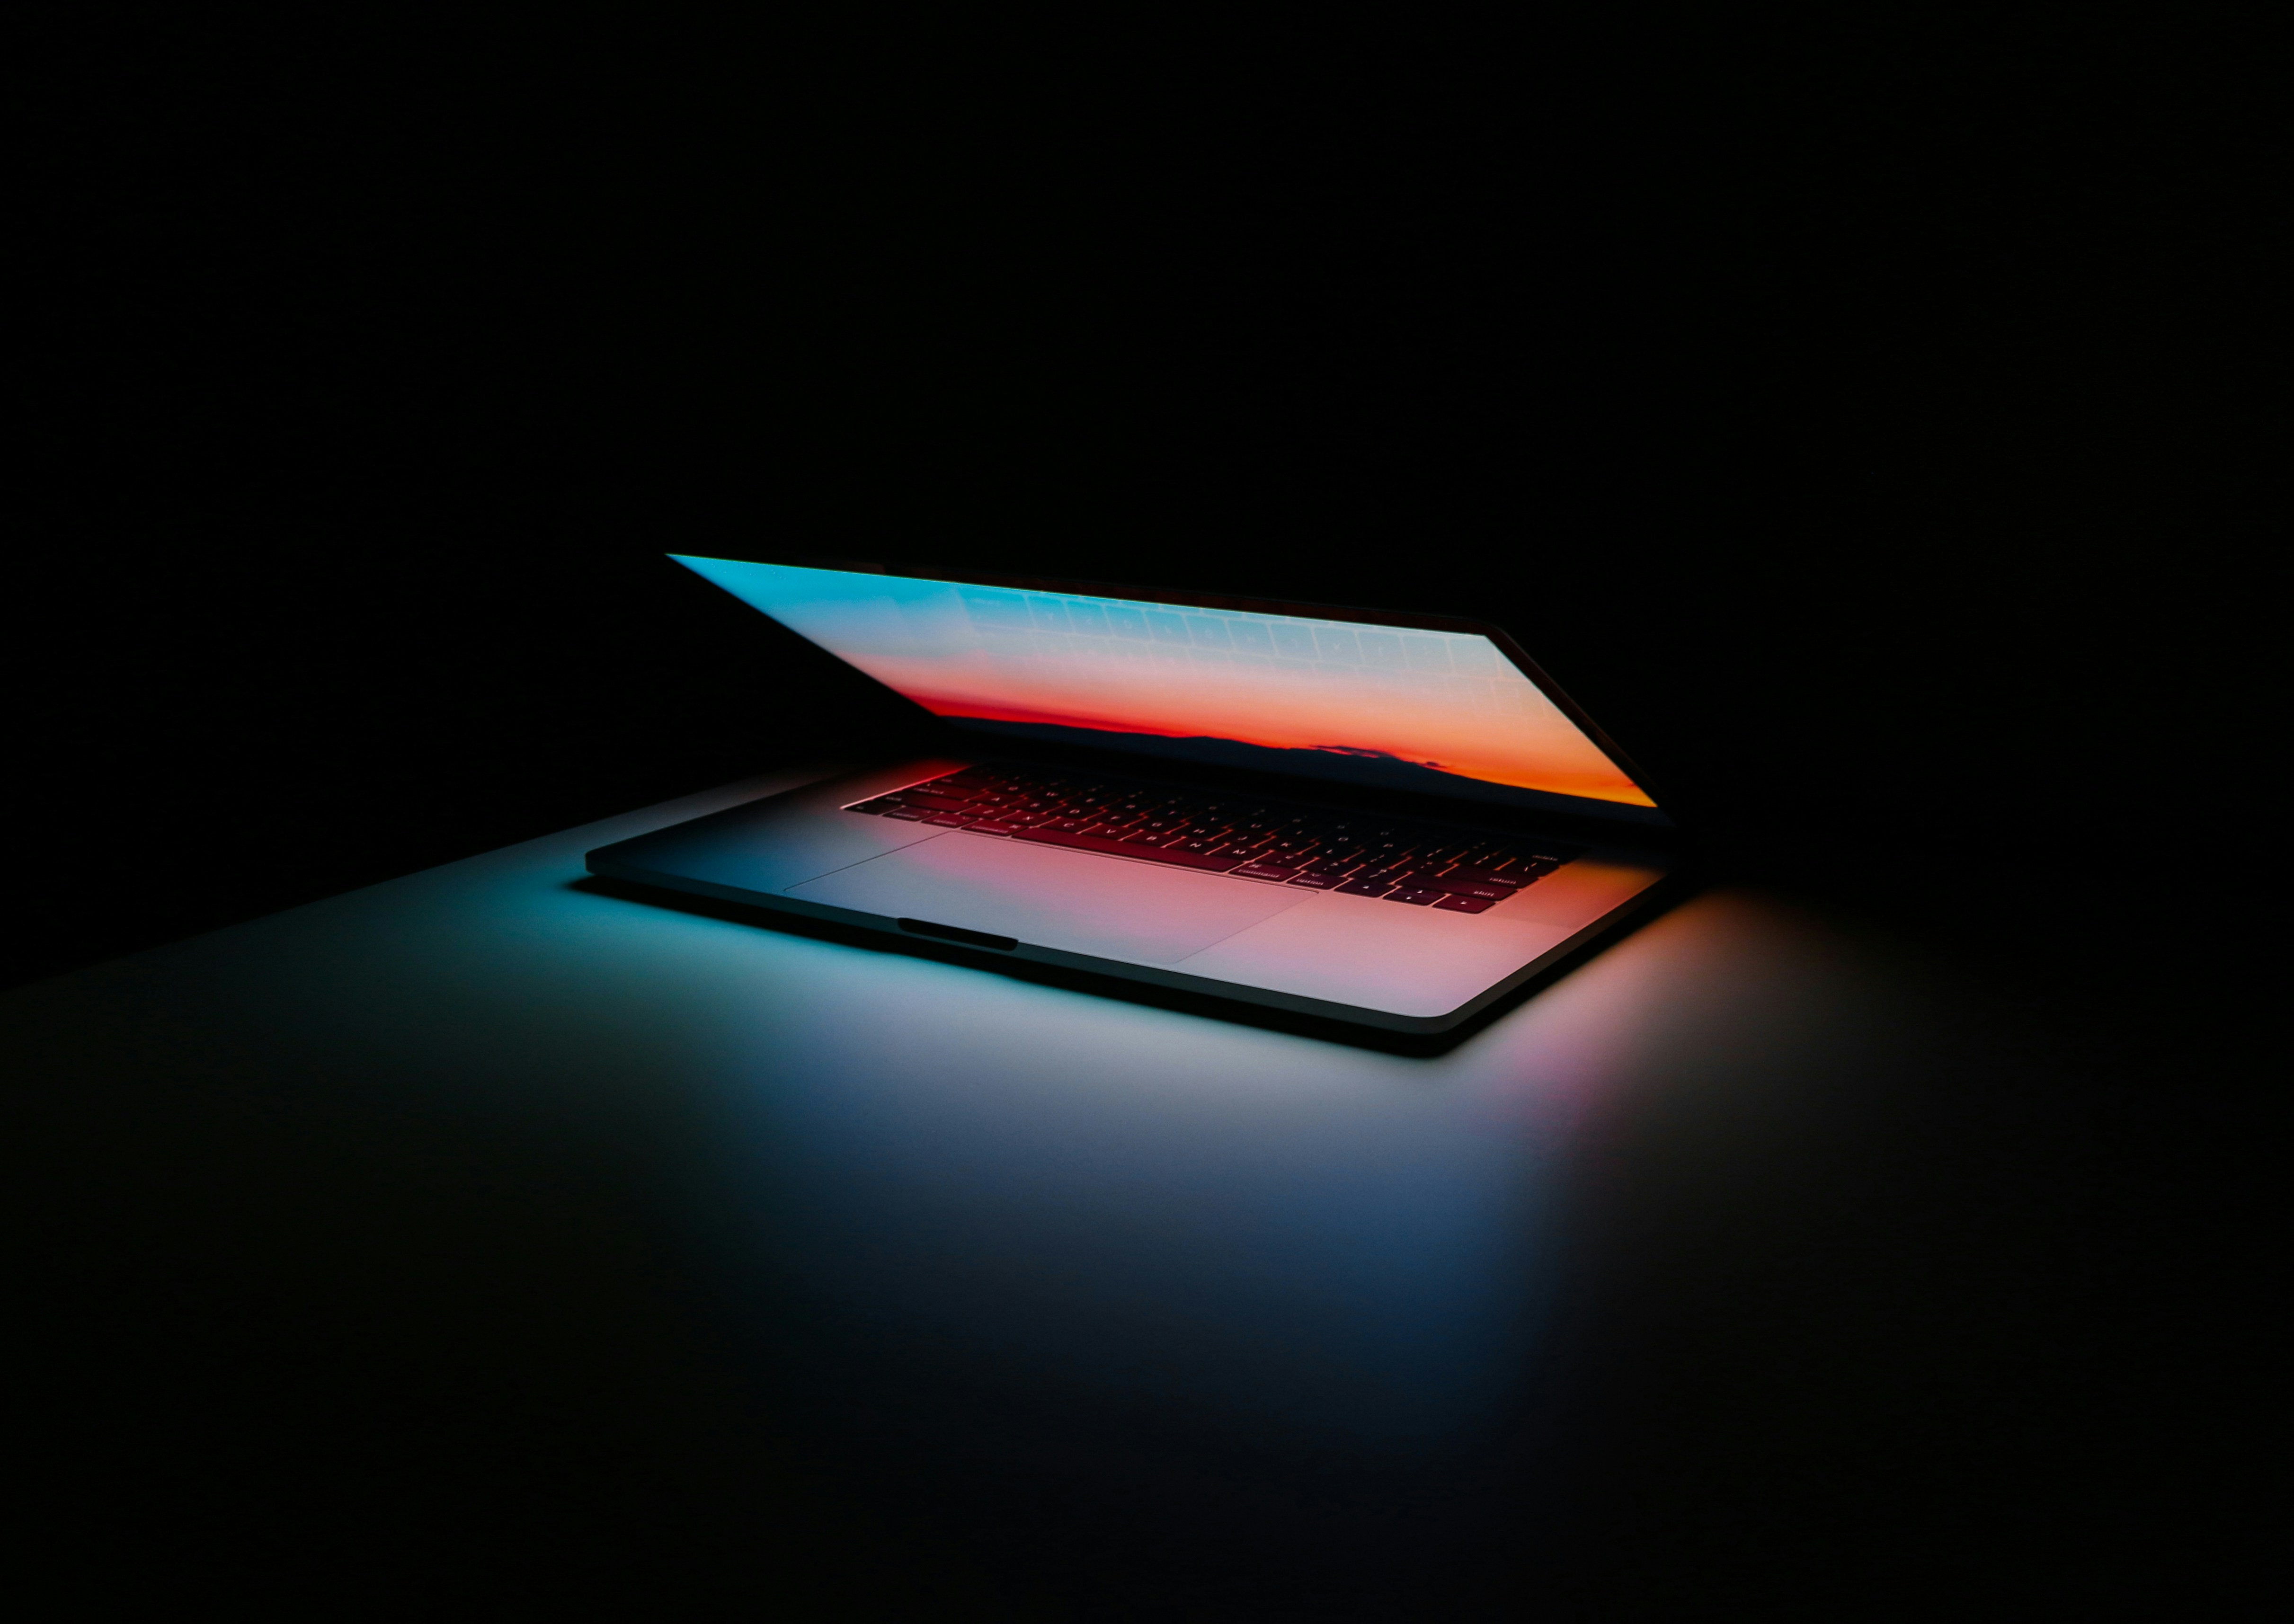

## Introduction

In this notebook we will be exploring the ML models to predict the laptop price accurately with the given specifications. Please do [check out my Github account](https://github.com/Abi-Abid) for detailed report of this project's insights, detailes, solutions, output and the detailed story telling.

This project, explore and compare the performance of various regression algorithms to determine which model offers the most accurate price predictions. Through proper preprocessing, feature engineering, model evaluation using metrics like RMSE and R² score, and tuning, this project will not only provide insight into laptop price prediction but also showcase the practical application of supervised learning in a consumer-focused industry.

In [21]:
#importng required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Overview

In [22]:
#importing data
#this data is collected from IBM Coursera Data Science 
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv')
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [23]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

From this we can notice that columns `Weight_kg` and `Screen_Size_cm` have '5' and '4' missing values respectively.

In [24]:
df.shape

(238, 13)

- The data set points 238 rows and 13 columns, from above we can notice that there are very few missing values as compared to the total number of rows, that is 238.
- Therefore, as these two columns `Weight_kg` and `Screen_Size_cm` are of numeric in type we can fill these missing values by the mean or the most frequent values accordingly. 

## Data Cleaning

In [25]:
#let's get rid of the 'unnamed' column
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [26]:
#for unique values of screen size
unique_values_screen_size = df['Screen_Size_cm'].unique()
unique_values_screen_size

array([35.56 , 39.624, 33.782, 38.1  , 33.02 , 43.942, 43.18 , 31.75 ,
       30.48 ,    nan])

In [27]:
#for unique values of weight
unique_values_weight = df['Weight_kg'].nunique()
unique_values_weight

77

- As we can see for the 'Screen size' column, we have in total 9 screen sizes, so let's replace the missing values in this column with most frequent ones.
- For 'weight' column there are 77 weights, so it's better we replace the missing values with the mean

In [28]:
#replacing missing values of screen size with most frequent values
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df['Screen_Size_cm'] = df['Screen_Size_cm'].replace(np.NaN, common_screen_size)

In [29]:
#replacing mising values of mean with mean values 

df['Weight_kg'].fillna(df['Weight_kg'].mean(), inplace = True)

In [30]:
#check for missing values
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

Great, now our data is fully cleaned and ready for analysis, well structured and without any missing values. 

## Exploratory Data Analysis

### Statistical Analysis

In [31]:
#statistic summary
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,37.309185,2.360084,7.882353,245.781513,1.862232,1462.344538
std,0.776533,0.638282,0.235790,1.241787,2.961753,0.411393,2.482603,34.765316,0.489090,574.607699
min,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.472500,1066.500000
50%,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.862232,1333.000000
75%,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


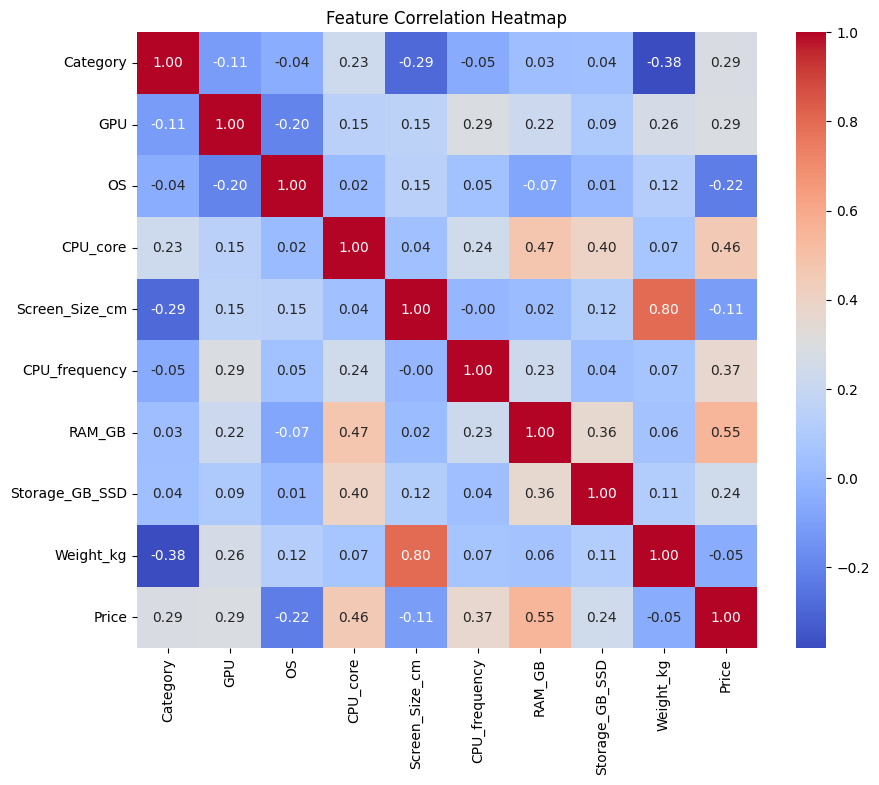

In [32]:
#selecting only numeric data for correlations 
numeric_df = df.select_dtypes(include = ['number'])

plt.figure(figsize = (10,8))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [33]:
# to analyze statisticl summary for categorical data
df.describe(include = ['object'])

,Manufacturer,Screen
count,238,238
unique,11,2
top,Dell,Full HD
freq,71,161


In [34]:
# binning for price 
bins = np.linspace(min(df['Price']), max(df['Price']), 4)
group_names = ['Low', 'High', 'Medium']
df['Price-binned'] = pd.cut(df['Price'], bins, labels = group_names, include_lowest = True)
df['Price-binned'].value_counts()


Price-binned
Low       160
High       72
Medium      6
Name: count, dtype: int64

This shows that the more laptops with low price, few laptops of high price and very few laptops of medium price. From this we can say that our data have either laptops with low and affordable price or High and expensable ones.

### Data Visualization

Here we will be using Scatter plot and Box plot to visualize the relationbetween features with the target column 'Price'. As we can see from the correlation heat map we can notice that numeric features like `RAM_GB`, `CPU_Frequency`, `CPU_Core`, `Storage_GB_SSD` and `Weight_kg` play a major role, and categorical feature like `Manufacturer` and `Screen` place an important role as well. Therfore with help of graphs let's analyze how the values are behaving with repect to `Price`

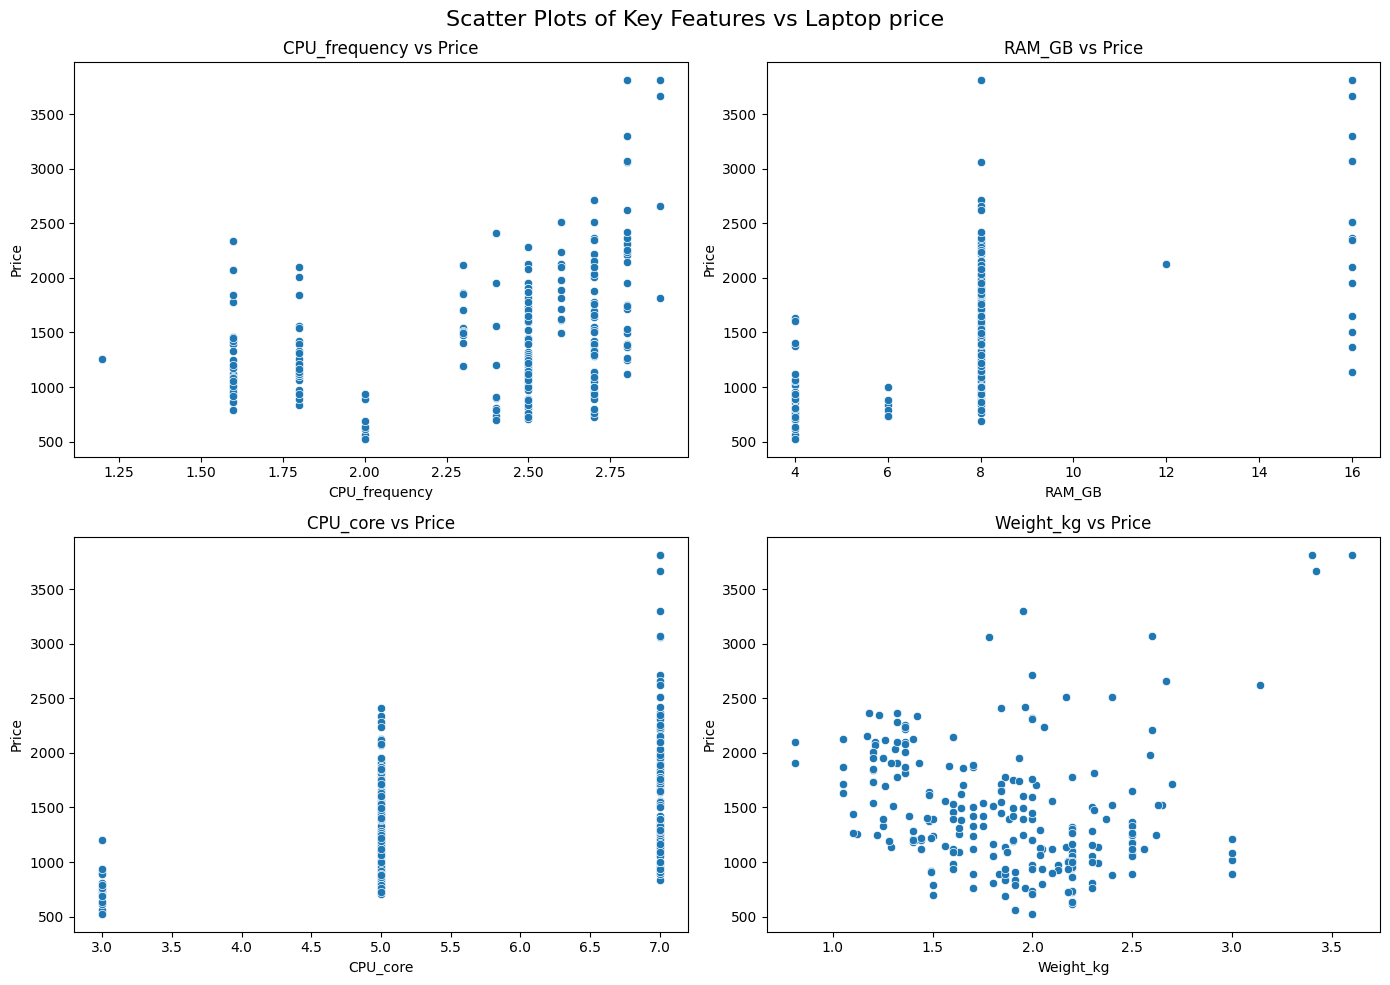

In [35]:
#subplot for the features discussed above

#setting up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
fig.suptitle('Scatter Plots of Key Features vs Laptop price', fontsize = 16)

#feature list and corresponding subplot locations
features = ['CPU_frequency', 'RAM_GB', 'CPU_core', 'Weight_kg']
positions = [(0,0), (0,1), (1,0), (1,1)]

#loop through features and plot
for features, pos in zip(features, positions):
    sns.scatterplot(data = df, x = features, y = 'Price', ax = axes[pos[0]] [pos[1]])
    axes[pos[0]][pos[1]].set_title(f'{features} vs Price')

plt.tight_layout()
plt.show()

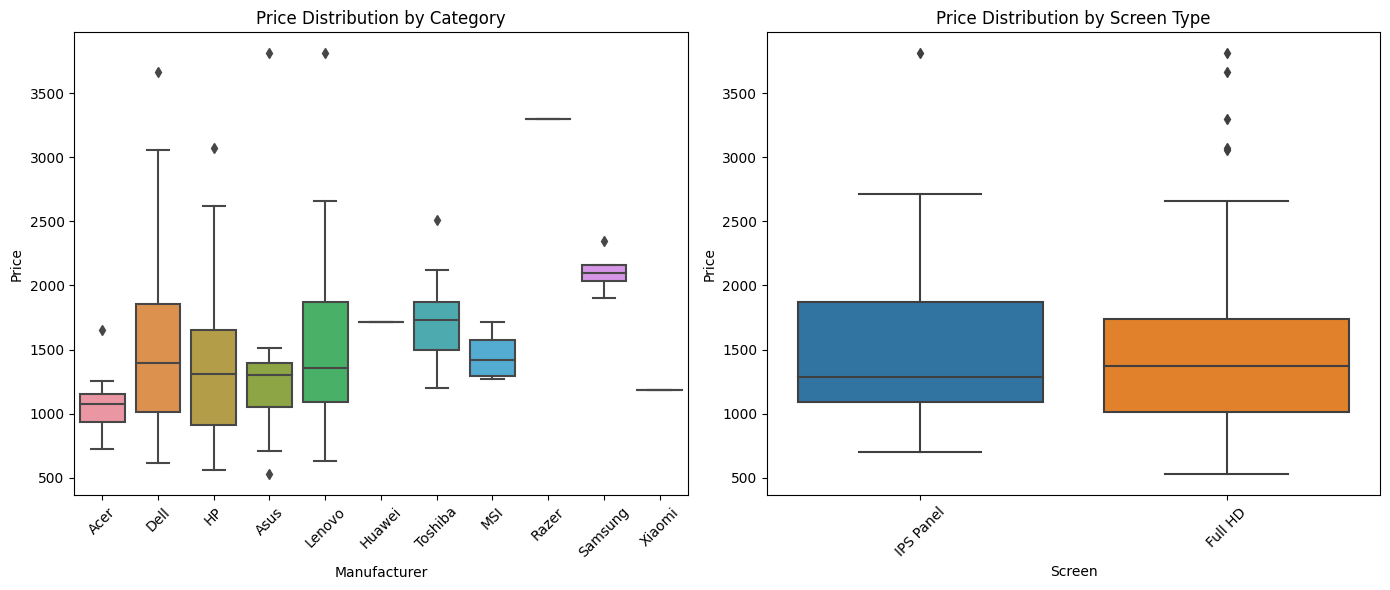

In [36]:
# box plot for categorical columns
plt.figure(figsize = (14, 6))

#Box plot for categorical vs price
plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'Manufacturer', y = 'Price')
plt.title('Price Distribution by Category')
plt.xticks(rotation = 45)

#Box plot for Screen vs Price
plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Screen', y = 'Price')
plt.title('Price Distribution by Screen Type')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

## Feature Engineering
- Encoding Categorical Variables - Using 'One-hot' encoding for nominal categories like 'Category', 'Screen', 'Manufacturer', and 'OS'.
- Handling Outliners and Skewed Features - Scaling numerical features using 'StandardScaler' or 'MinMaxScaler'

As the price range is not linear and varies, let's stratify this target column while sppliting, those statify apply only for categorical data nad not numerical data, let's first convert this into bins and apply stratification.

In [37]:
from sklearn.model_selection import train_test_split

df_model = df.copy()

#Binning target just for stratification
df_model['Price_bin'] = pd.qcut(df_model['Price'], q = 3, labels = ['Low', 'Medium', 'High'])

#seperating target
y = df_model['Price']
X = df_model.drop(columns = ['Price', 'Price_bin'])

#one hot encode categorical features 
X_encoded = pd.get_dummies(X, drop_first = True)

#Stratified split using binned labels
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.3, stratify = df_model['Price_bin'], random_state = 42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Development and Evaluation

To achieve accurate predictions for this project, we will apply several regression models and compare their performance. Since the dataset is relatively small — containing only 238 records (laptops) — it's more practical to focus on evaluating multiple regression algorithms rather than diving into hyperparameter tuning or GridSearchCV. Performing complex tuning on such a limited dataset may lead to underfitting or overfitting, as the models could either oversimplify or overinterpret patterns that aren't truly generalizable. Therefore, we'll proceed with basic regression approaches and assess their accuracy to determine the best fit for this task.

First fit the model for the train splits and predict on the test data, and calculate the values for `R2 Score`, `MAE`, and `RMSE`. The result is converted into a dataframe with `R2 Score` values from high to low.

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial (Deg=2)': make_pipeline(PolynomialFeatures(2), LinearRegression()),
    'Polynomial (Deg=3)': make_pipeline(PolynomialFeatures(3), LinearRegression()),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR()
}

In [41]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'R2 Score': r2,
        'MAE': mae,
        'RMSE': rmse
    })

# Convert to DataFrame for display
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
results_df

,Model,R2 Score,MAE,RMSE
3,Ridge Regression,8.597915e-01,1.376553e+02,1.775319e+02
0,Linear Regression,8.580715e-01,1.384262e+02,1.786175e+02
4,Lasso Regression,8.568263e-01,1.400237e+02,1.793993e+02
7,Gradient Boosting,8.316109e-01,1.545544e+02,1.945567e+02
6,Random Forest,8.182772e-01,1.650677e+02,2.021129e+02
8,AdaBoost,7.781667e-01,1.838869e+02,2.233071e+02
5,Decision Tree,5.887565e-01,2.261181e+02,3.040456e+02
9,SVR,-1.040267e-02,3.854669e+02,4.765807e+02
2,Polynomial (Deg=3),-1.622569e+03,1.175328e+04,1.910401e+04
1,Polynomial (Deg=2),-5.821046e+22,3.552180e+13,1.143904e+14


In [42]:
df.to_csv('Laptop_pricing.csv', index = False)

## Key Insights
The Laptop Prices dataset used in this project contains 238 entries, each representing a unique laptop with 12 features. During the exploratory data analysis phase, it was observed that certain features significantly influence the price of a laptop. Among them, RAM size (in GB), CPU frequency, CPU core, and the weight of the laptop had the most notable impact. In general, **laptops with higher RAM, faster CPUs (e.g., frequencies of 2.5 GHz or more), and lighter weight tend to be priced higher.** Additionally, the distribution of prices was found to be right-skewed, meaning that most laptops are in the affordable price range, while a smaller number fall into the high-end category.

To predict the price of a laptop, several regression models were applied and evaluated based on **R² score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).** Among the models tested, Ridge Regression, Linear Regression, and Lasso Regression performed the best, achieving high R² scores and low error values. These models demonstrated good predictive performance and generalization on the test data. Given the relatively small size of the dataset, hyperparameter tuning methods like GridSearchCV were intentionally avoided. Applying such techniques on limited data may lead to overfitting or underfitting, as the model could make incorrect assumptions due to insufficient variability in the dataset.

After comparing all models, **Ridge Regression** emerged as the most accurate and stable, making it the final choice for this project. It provides a reliable way to predict laptop prices based on key specifications without overfitting the data. With this model, new laptops' prices can be estimated effectively, helping consumers, retailers, or manufacturers understand pricing trends and make informed decisions. This concludes the project with a well-performing regression model that can be further refined or scaled if more data becomes available.